In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('traffic-signal-vehicle-and-pedestrian-volumes-data.csv', encoding='utf-8-sig', sep='\s*,\s*', engine='python')
print(df.shape)
df.head()

(2280, 11)


,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
0,2,JARVIS ST,NaN,FRONT ST E,NaN,11/15/1948,43.649418,-79.371446,06/21/2017,15662,13535
1,3,KING ST E,NaN,JARVIS ST,NaN,08/23/1950,43.650461,-79.371924,09/17/2016,12960,7333
2,4,JARVIS ST,NaN,ADELAIDE ST E,NaN,09/12/1958,43.651534,-79.372360,11/08/2016,17770,7083
3,5,JARVIS ST,NaN,RICHMOND ST E,NaN,04/21/1962,43.652718,-79.372824,12/08/2015,19678,4369
4,6,JARVIS ST,NaN,QUEEN ST E,NaN,08/24/1928,43.653704,-79.373238,09/17/2016,14487,3368


In [3]:
df.describe()

,TCS #,Latitude,Longitude,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
count,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000
mean,1155.409649,43.713472,-79.394597,15749.164035,1990.127193
std,678.773805,0.056042,0.164106,7347.998879,3984.960526
min,2.000000,43.591686,-79.639290,1081.000000,0.000000
25%,572.750000,43.664934,-79.475262,10386.750000,280.000000
50%,1142.500000,43.709355,-79.396512,14261.000000,712.000000
75%,1722.250000,43.760777,-79.317662,19555.750000,1700.250000
max,3014.000000,43.855450,-73.389642,56432.000000,47561.000000


In [4]:
df_main =df.groupby(by='Main')[['8 Peak Hr Pedestrian Volume','8 Peak Hr Vehicle Volume', 'Latitude', 'Longitude']].mean().sort_values(by='8 Peak Hr Pedestrian Volume', ascending=False).reset_index()
df_main

,Main,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
0,BLOOR ST,23335.000000,14398.000000,43.670229,-79.386767
1,BAY ST,17194.750000,14524.450000,43.658325,-79.384589
2,YORK ST,16209.750000,11101.250000,43.647326,-79.383293
3,FRONT ST W,16060.500000,10568.750000,43.643394,-79.390946
4,UNIVERSITY AVE,12846.090909,22119.545455,43.651889,-79.386793
...,...,...,...,...,...
243,TANGIERS RD,23.000000,3016.000000,43.766976,-79.489708
244,ZOO RD,16.000000,1982.000000,43.818187,-79.173580
245,OLD FINCH AVE,0.000000,1081.000000,43.825259,-79.196812
246,SHERWAY GARDENS RD,0.000000,9713.000000,43.613090,-79.552280


In [5]:
# filter the main roads having highest pedestrian volume
top = df_main[(df_main['8 Peak Hr Pedestrian Volume']>1200) | (df['8 Peak Hr Vehicle Volume']>12000)].reset_index()
top.drop(columns='index', inplace=True)
print(top.shape)
top.head()

(208, 5)


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Main,8 Peak Hr Pedestrian Volume,8 Peak Hr Vehicle Volume,Latitude,Longitude
0,BLOOR ST,23335.000000,14398.000000,43.670229,-79.386767
1,BAY ST,17194.750000,14524.450000,43.658325,-79.384589
2,YORK ST,16209.750000,11101.250000,43.647326,-79.383293
3,FRONT ST W,16060.500000,10568.750000,43.643394,-79.390946
4,UNIVERSITY AVE,12846.090909,22119.545455,43.651889,-79.386793


In [6]:
#roads that have the average of pedestrian volume above 1200 or vehicle volume above 12000 during peak hour (above ~70%)is 208 main roads.

#Finally, we can visualize the roads using Folium Python module from the given coordinates. The map shows a glimpse of busiest roads in the city, where many are located around downtown

In [7]:
import folium # map rendering library
from geopy.geocoders import Nominatim


In [8]:
from geopy.geocoders import Nominatim

address = 'Toronto, Ontario'

# Define a unique user_agent
geolocator = Nominatim(user_agent="toronto_explorer")

# Retrieve Toronto coordinate
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [9]:
# create map of Toronto using latitude and longitude values
ft_map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, mainroad, pedes, vehic in zip(top['Latitude'], top['Longitude'], top['Main'], top['8 Peak Hr Pedestrian Volume'], top['8 Peak Hr Vehicle Volume']):
    label = '{}, (Pedestrian Volume Avg: {}, Vehicle Volume Avg: {})'.format(mainroad, round(pedes, 2), round(vehic, 2))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(ft_map_toronto)  
    
ft_map_toronto

In [10]:
#we analyze the crime statistics data from 2014 to 2019.

In [11]:
mci_df = pd.read_csv('MCI_2014_to_2019.csv')
mci_df.drop( columns=['X', 'Y', 'Index_', 'event_unique_id', 'ucr_code', 'ucr_ext', 'ObjectId'], inplace=True)
temp = mci_df['reportedyear']
mci_df = mci_df[[column for column in mci_df.columns if column.startswith('occ') is False and column.startswith('rep') is False]]
mci_df['reportedyear'] = temp
mci_df


,premisetype,offence,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,reportedyear
0,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
1,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
2,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
3,Other,Assault With Weapon,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2014
4,Commercial,B&E,Break and Enter,D14,79,University (79),43.665390,-79.410,2014
...,...,...,...,...,...,...,...,...,...
206430,Outside,Theft Of Motor Vehicle,Auto Theft,D31,21,Humber Summit (21),43.750652,-79.549,2019
206431,Commercial,Theft Of Motor Vehicle,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.683521,-79.481,2019
206432,Outside,Theft Of Motor Vehicle,Auto Theft,D31,21,Humber Summit (21),43.758480,-79.571,2019
206433,Outside,Theft Of Motor Vehicle,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.675377,-79.506,2019


In [12]:
# 130374 crime incidents segmented by police divisional boundaries, neighborhoods, and Major Crime Indicators (MCI). Toronto police divides the major crimes into 5 categories scattered to 17 divisions, and 140 listed neighborhoods.

In [13]:
mci_df.shape

(206435, 9)

In [14]:
len(mci_df['Hood_ID'].unique())

140

In [15]:
#We will group the data based on division (Division), not neighborhood (Hood_ID).

In [16]:
mci_divison = mci_df.groupby('Division').count().sort_values(by='offence', ascending=False).reset_index()
mci_divison.head()

,Division,premisetype,offence,MCI,Hood_ID,Neighbourhood,Lat,Long,reportedyear
0,D51,16944,16944,16944,16944,16944,16944,16944,16944
1,D41,15675,15675,15675,15675,15675,15675,15675,15675
2,D43,15652,15652,15652,15652,15652,15652,15652,15652
3,D32,15377,15377,15377,15377,15377,15377,15377,15377
4,D14,15202,15202,15202,15202,15202,15202,15202,15202


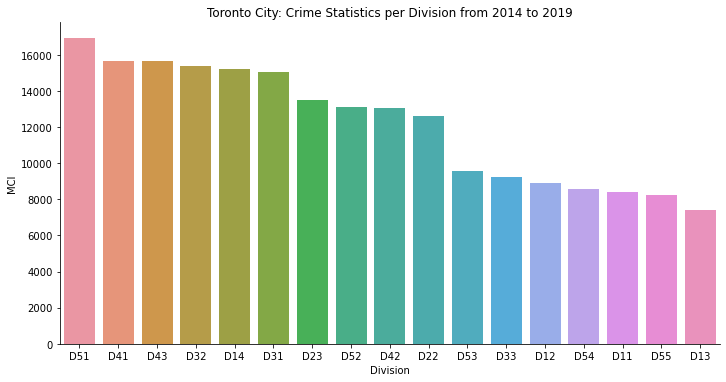

In [17]:
import seaborn as sns
g = sns.catplot(data = mci_divison, x='Division', y='MCI', kind='bar', aspect=2)
g.set(title='Toronto City: Crime Statistics per Division from 2014 to 2019')

In [18]:
#Among the 5 MCI, Assault incidents are still number one occurred the most for 6 consecutive years. During the same period, several divisions are consistent about their crime rates. Thus, the divisions fall into three categories:

    #High Crime Rates (D51, D43, D41, D32, D31, D14)
    #Middle Crime Rates (D52, D42, D23, D22)
    #Low Crime Rates (D55, D54, D53, D33, D13, D12, D11)

#Finally, to pick the area of interest, the candidates are expected to be:

    #safe - having low crime rates
    #lively - crowded by people, vehicles, and easy to access
    #close to downtown.

#Therefore, the divisions qualified are D55, D54, D53, and D13. Referring to Toronto Police Service Wikipedia [6], these divisions cover:

    #Central Toronto (D53)
    #East York (D53, D54,D 55)
    #York (D13)
# Next we will explore the neighborhoods inside Central Toronto, East York, and York as the selected boroughs.

In [19]:
toronto_df = pd.read_csv('toronto_poscode_latlng.csv')
print(toronto_df.shape)
toronto_df.head()

(103, 5)


,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188


In [20]:
boroughs_df = toronto_df[(toronto_df['Borough']=='Central Toronto') | (toronto_df['Borough']=='East York') | (toronto_df['Borough']=='York')].reset_index(drop=True)
print(boroughs_df.shape)
boroughs_df.head()

(19, 5)


,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192
1,M4C,East York,Woodbine Heights,43.68970,-79.30682
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046
4,M4G,East York,Leaside,43.70902,-79.36349


In [21]:
boroughs_df['Neighbourhood'] = boroughs_df['Neighbourhood'].apply(lambda x: x.split(',')[0])
boroughs_df.head()

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,Parkview Hill,43.70718,-79.31192
1,M4C,East York,Woodbine Heights,43.68970,-79.30682
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046
4,M4G,East York,Leaside,43.70902,-79.36349


In [22]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df['latitude'], toronto_df['longitude'], toronto_df['Borough'], toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [23]:
boroughs_venues= pd.read_csv('boroughs_venues.csv')
boroughs_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkview Hill,43.70718,-79.31192,Toronto Climbing Academy,43.709362,-79.315006,Rock Climbing Spot
1,Parkview Hill,43.70718,-79.31192,Jawny Bakers,43.705783,-79.312913,Gastropub
2,Parkview Hill,43.70718,-79.31192,Muddy York Brewing Co.,43.712362,-79.312019,Brewery
3,Parkview Hill,43.70718,-79.31192,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
4,Parkview Hill,43.70718,-79.31192,Peek Freans Cookie Outlet,43.713260,-79.308063,Bakery
...,...,...,...,...,...,...,...
900,Summerhill West,43.68568,-79.40237,Harvey's,43.689693,-79.394450,Restaurant
901,Summerhill West,43.68568,-79.40237,L'atelier,43.682148,-79.391696,Furniture / Home Store
902,Summerhill West,43.68568,-79.40237,Queen's Own Rifles of Canada Museum and Archives,43.678472,-79.409308,History Museum
903,Summerhill West,43.68568,-79.40237,La Libre,43.677408,-79.398231,Mexican Restaurant


In [24]:
neighbor_df = boroughs_venues.groupby(by='Neighborhood').count().sort_values(by='Venue', ascending=False).reset_index()

neighbor_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Davisville,100,100,100,100,100,100
1,Davisville North,100,100,100,100,100,100
2,The Annex,100,100,100,100,100,100
3,Summerhill West,89,89,89,89,89,89
4,Woodbine Heights,68,68,68,68,68,68
5,Moore Park,66,66,66,66,66,66
6,Leaside,61,61,61,61,61,61
7,East Toronto,60,60,60,60,60,60
8,North Toronto West,49,49,49,49,49,49
9,Thorncliffe Park,38,38,38,38,38,38


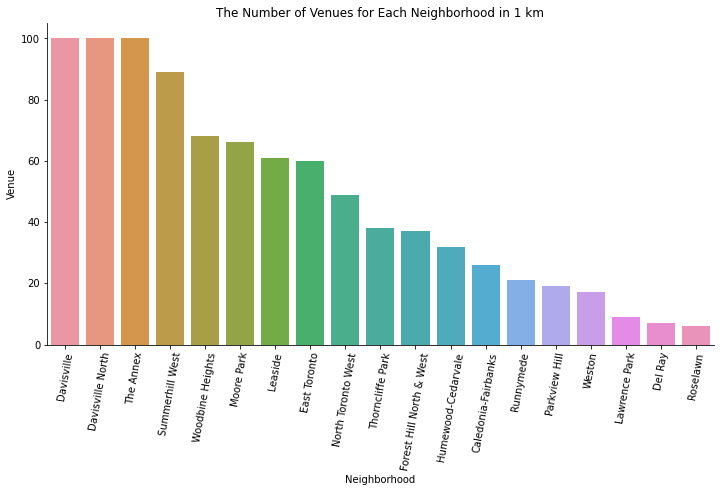

In [25]:
g = sns.catplot( data=neighbor_df, x='Neighborhood', y='Venue', kind='bar', aspect=2)
g.set_xticklabels(rotation=80)
g.set(title='The Number of Venues for Each Neighborhood in 1 km')

In [26]:
#Our next objective is to create a dataframe containing the top 10 venues for each neighborhood.
# one hot encoding and adjust the name prefix
boroughs_onehot = pd.get_dummies(boroughs_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to the dataframe
boroughs_onehot['Neighbourhood'] = boroughs_venues['Neighborhood']

# # move neighborhood column to the first column
fixed_columns = [boroughs_onehot.columns[-1]] + list(boroughs_onehot.columns[:-1])
boroughs_onehot = boroughs_onehot[fixed_columns]
boroughs_onehot.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

boroughs_grouped = boroughs_onehot.groupby(by='Neighbourhood').mean().reset_index()
boroughs_grouped



,Neighbourhood,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Bagel Shop,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Caledonia-Fairbanks,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.038462,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.038462,0.000000
1,Davisville,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.01,0.010000,...,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.010000
2,Davisville North,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.00,0.000000,0.020000
3,Del Ray,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,East Toronto,0.000000,0.033333,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Forest Hill North & West,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.027027,...,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Humewood-Cedarvale,0.000000,0.031250,0.000000,0.00,0.000000,0.000000,0.031250,0.00,0.031250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Lawrence Park,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,Leaside,0.000000,0.000000,0.000000,0.00,0.000000,0.016393,0.016393,0.00,0.016393,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,Moore Park,0.000000,0.015152,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.030303,...,0.000000,0.000000,0.000000,0.000000,0.015152,0.000000,0.000000,0.00,0.000000,0.015152


In [28]:
#Let's create a dataframe with the top 10 most common venues

#Define a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


#Now let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        # Add column names such as 1st, 2nd, 3rd Most Common Venue
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        # Add column names such as 4th, 5th, .. ,10th Most Common Venue
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# In the end, we have:
# columns == ['Neighborhood', '1st Most Common Venue', .. , '10th Most Common Venue']        

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boroughs_grouped['Neighbourhood']

for ind in np.arange(boroughs_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boroughs_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Caledonia-Fairbanks,Pizza Place,Park,Coffee Shop,Portuguese Restaurant,Bus Line,Grocery Store,Women's Store,Japanese Restaurant,Food Truck,Mexican Restaurant
1,Davisville,Italian Restaurant,Coffee Shop,Sushi Restaurant,Indian Restaurant,Café,Restaurant,Pizza Place,Dessert Shop,Gym,Bakery
2,Davisville North,Coffee Shop,Italian Restaurant,Café,Pizza Place,Dessert Shop,Restaurant,Gym,Fast Food Restaurant,Park,Japanese Restaurant
3,Del Ray,Park,Convenience Store,Grocery Store,Coffee Shop,Sandwich Place,Fast Food Restaurant,Gas Station,Discount Store,Falafel Restaurant,Ethiopian Restaurant
4,East Toronto,Coffee Shop,Café,Sandwich Place,Ethiopian Restaurant,Pizza Place,Convenience Store,Park,Thai Restaurant,Beer Store,Beer Bar


In [31]:

#Cluster the Neighborhoods

#We will run the k-Means algorithm to build a clustering model with a different number of clusters (k).

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


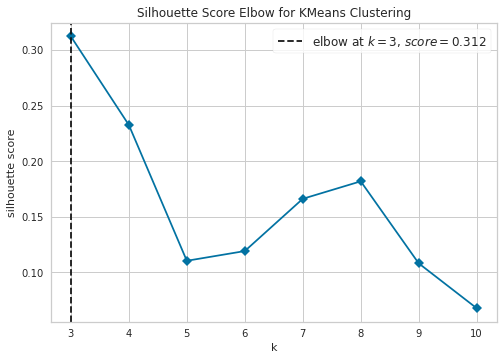

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
kclusters = (3,11)

boroughs_grouped_clustering = boroughs_grouped.drop('Neighbourhood', 1)

# run k-means clustering
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=kclusters, metric='silhouette', timings=False) # random state = 0

visualizer.fit(boroughs_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()               

In [33]:

#We can inspect that the best k value for this task is 4. Hence, we will have 4 cluster neighborhoods at the end.
# run k-means clustering
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boroughs_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0],
      dtype=int32)

In [34]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels'] = pd.Series(kmeans.labels_)

boroughs_merged = boroughs_df

# merge boroughs_grouped with boroughs_df to add latitude/longitude for each neighborhood
boroughs_merged = boroughs_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

boroughs_merged.head()

,PostalCode,Borough,Neighbourhood,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M4B,East York,Parkview Hill,43.70718,-79.31192,Gym / Fitness Center,Pizza Place,Intersection,Office,Rock Climbing Spot,Coffee Shop,Fast Food Restaurant,Soccer Stadium,Pet Store,Brewery,0
1,M4C,East York,Woodbine Heights,43.68970,-79.30682,Pizza Place,Coffee Shop,Ice Cream Shop,Grocery Store,Park,Café,Bank,Bakery,Sushi Restaurant,Arts & Crafts Store,0
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036,Pizza Place,Coffee Shop,Convenience Store,Beer Store,Grocery Store,Middle Eastern Restaurant,Rental Service,Restaurant,Sandwich Place,Seafood Restaurant,0
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046,Pizza Place,Park,Coffee Shop,Portuguese Restaurant,Bus Line,Grocery Store,Women's Store,Japanese Restaurant,Food Truck,Mexican Restaurant,0
4,M4G,East York,Leaside,43.70902,-79.36349,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Grocery Store,Electronics Store,Department Store,Burger Joint,Shopping Mall,Sports Bar,Restaurant,0


In [35]:

#Rearrange the columns
columns = [column for column in boroughs_merged.columns if column.endswith('Venue')]
columns = ['Borough', 'Neighbourhood', 'Cluster Labels'] + columns
boroughs_merged[columns]

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East York,Parkview Hill,0,Gym / Fitness Center,Pizza Place,Intersection,Office,Rock Climbing Spot,Coffee Shop,Fast Food Restaurant,Soccer Stadium,Pet Store,Brewery
1,East York,Woodbine Heights,0,Pizza Place,Coffee Shop,Ice Cream Shop,Grocery Store,Park,Café,Bank,Bakery,Sushi Restaurant,Arts & Crafts Store
2,York,Humewood-Cedarvale,0,Pizza Place,Coffee Shop,Convenience Store,Beer Store,Grocery Store,Middle Eastern Restaurant,Rental Service,Restaurant,Sandwich Place,Seafood Restaurant
3,York,Caledonia-Fairbanks,0,Pizza Place,Park,Coffee Shop,Portuguese Restaurant,Bus Line,Grocery Store,Women's Store,Japanese Restaurant,Food Truck,Mexican Restaurant
4,East York,Leaside,0,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Grocery Store,Electronics Store,Department Store,Burger Joint,Shopping Mall,Sports Bar,Restaurant
5,East York,Thorncliffe Park,0,Indian Restaurant,Afghan Restaurant,Restaurant,Turkish Restaurant,Coffee Shop,Grocery Store,Greek Restaurant,Pub,Pool,Pizza Place
6,East York,East Toronto,0,Coffee Shop,Café,Sandwich Place,Ethiopian Restaurant,Pizza Place,Convenience Store,Park,Thai Restaurant,Beer Store,Beer Bar
7,York,Del Ray,2,Park,Convenience Store,Grocery Store,Coffee Shop,Sandwich Place,Fast Food Restaurant,Gas Station,Discount Store,Falafel Restaurant,Ethiopian Restaurant
8,Central Toronto,Lawrence Park,0,Café,Bus Line,Gym / Fitness Center,Park,Restaurant,College Quad,Coffee Shop,Trail,Yoga Studio,Dog Run
9,Central Toronto,Roselawn,1,Pharmacy,Trail,Bank,Café,Skating Rink,Farmers Market,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Dry Cleaner


In [36]:
#Retrieve the top 3 most common venues
temp = boroughs_merged[[column for column in boroughs_merged.columns if (column.startswith('1st')) | (column.startswith('2')) | (column.startswith('3')) | (column=='Cluster Labels')]]
temp

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Cluster Labels
0,Gym / Fitness Center,Pizza Place,Intersection,0
1,Pizza Place,Coffee Shop,Ice Cream Shop,0
2,Pizza Place,Coffee Shop,Convenience Store,0
3,Pizza Place,Park,Coffee Shop,0
4,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,0
5,Indian Restaurant,Afghan Restaurant,Restaurant,0
6,Coffee Shop,Café,Sandwich Place,0
7,Park,Convenience Store,Grocery Store,2
8,Café,Bus Line,Gym / Fitness Center,0
9,Pharmacy,Trail,Bank,1


In [37]:
#visualize the resulting clusters
#After performing k-Means with 4 clusters, we can update the map by labeling each neighborhood with the cluster number and unique colo
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library
latitude = 43.69479
longitude = -79.41440
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boroughs_merged['latitude'], boroughs_merged['longitude'], boroughs_merged['Neighbourhood'], boroughs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [38]:
#examine venues listed inside each cluster and define the discriminating venue categories that distinguish them.
#Cluster 1
cluster_0 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 0, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_0

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Parkview Hill,Gym / Fitness Center,Pizza Place,Intersection,Office,Rock Climbing Spot,Coffee Shop,Fast Food Restaurant,Soccer Stadium,Pet Store,Brewery,0
1,Woodbine Heights,Pizza Place,Coffee Shop,Ice Cream Shop,Grocery Store,Park,Café,Bank,Bakery,Sushi Restaurant,Arts & Crafts Store,0
2,Humewood-Cedarvale,Pizza Place,Coffee Shop,Convenience Store,Beer Store,Grocery Store,Middle Eastern Restaurant,Rental Service,Restaurant,Sandwich Place,Seafood Restaurant,0
3,Caledonia-Fairbanks,Pizza Place,Park,Coffee Shop,Portuguese Restaurant,Bus Line,Grocery Store,Women's Store,Japanese Restaurant,Food Truck,Mexican Restaurant,0
4,Leaside,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Grocery Store,Electronics Store,Department Store,Burger Joint,Shopping Mall,Sports Bar,Restaurant,0
5,Thorncliffe Park,Indian Restaurant,Afghan Restaurant,Restaurant,Turkish Restaurant,Coffee Shop,Grocery Store,Greek Restaurant,Pub,Pool,Pizza Place,0
6,East Toronto,Coffee Shop,Café,Sandwich Place,Ethiopian Restaurant,Pizza Place,Convenience Store,Park,Thai Restaurant,Beer Store,Beer Bar,0
8,Lawrence Park,Café,Bus Line,Gym / Fitness Center,Park,Restaurant,College Quad,Coffee Shop,Trail,Yoga Studio,Dog Run,0
11,Weston,Train Station,Pizza Place,Coffee Shop,Pharmacy,Soccer Field,Laundromat,Skating Rink,Diner,Sandwich Place,Fried Chicken Joint,0
12,Davisville North,Coffee Shop,Italian Restaurant,Café,Pizza Place,Dessert Shop,Restaurant,Gym,Fast Food Restaurant,Park,Japanese Restaurant,0


In [39]:
#cluster 2
cluster_1 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 1, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
print(cluster_1.shape)
cluster_1

(1, 12)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
9,Roselawn,Pharmacy,Trail,Bank,Café,Skating Rink,Farmers Market,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Dry Cleaner,1


In [40]:
first = cluster_0.iloc[:,0:2].groupby('1st Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
first.rename(columns={'1st Most Common Venue':'Venue'}, inplace=True)
first

,Venue,Neighbourhood
0,Coffee Shop,6
1,Pizza Place,3
2,Café,1
3,Gym / Fitness Center,1
4,Indian Restaurant,1
5,Italian Restaurant,1
6,Park,1
7,Restaurant,1
8,Train Station,1


In [41]:
second = cluster_0[['Neighbourhood','2nd Most Common Venue']].groupby('2nd Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
second.rename(columns={'2nd Most Common Venue':'Venue'}, inplace=True)
second

,Venue,Neighbourhood
0,Coffee Shop,3
1,Italian Restaurant,3
2,Café,2
3,Pizza Place,2
4,Afghan Restaurant,1
5,Bus Line,1
6,Grocery Store,1
7,Park,1
8,Sporting Goods Shop,1
9,Sushi Restaurant,1


In [42]:
third = cluster_0[['Neighbourhood','3rd Most Common Venue']].groupby('3rd Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
third.rename(columns={'3rd Most Common Venue':'Venue'}, inplace=True)
third

,Venue,Neighbourhood
0,Coffee Shop,3
1,Italian Restaurant,2
2,Café,1
3,Convenience Store,1
4,Furniture / Home Store,1
5,Gym,1
6,Gym / Fitness Center,1
7,Ice Cream Shop,1
8,Intersection,1
9,Restaurant,1


In [50]:
cluster_0_top3 = pd.concat([first, second, third])
cluster_0_top3 = cluster_0_top3.groupby(by='Venue').sum().sort_values(by='Neighbourhood', ascending=False)
cluster_0_top3

,Neighbourhood
Venue,
Coffee Shop,12
Italian Restaurant,6
Pizza Place,5
Café,4
Sushi Restaurant,2
Gym / Fitness Center,2
Restaurant,2
Park,2
Afghan Restaurant,1


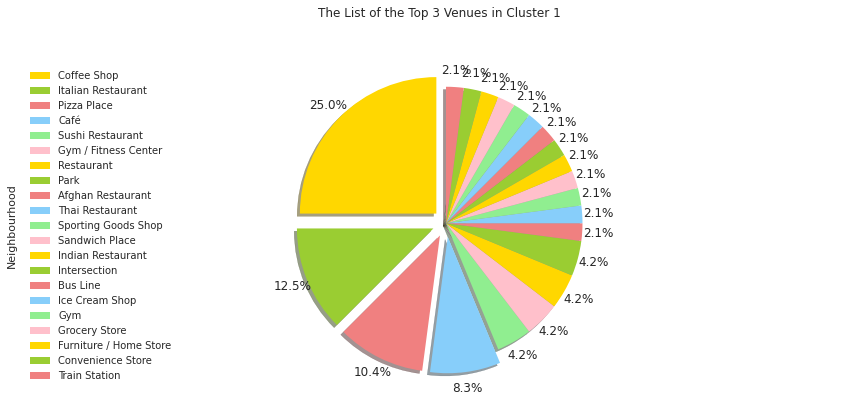

In [46]:
 
# ratio for each venue with which to offset each wedge.
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.1, 0.1, 0.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

cluster_0_top3['Neighbourhood'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,        
                            pctdistance=1.12, 
                            colors= colors_list,
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('The List of the Top 3 Venues in Cluster 1', y=1.12, loc='center') 

plt.axis('equal') 

# add legend
plt.legend(labels=cluster_0_top3.index, loc='upper left') 

plt.show()

In [47]:
#Cluster 3
cluster_2 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 2, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_2

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
7,Del Ray,Park,Convenience Store,Grocery Store,Coffee Shop,Sandwich Place,Fast Food Restaurant,Gas Station,Discount Store,Falafel Restaurant,Ethiopian Restaurant,2


In [48]:
#Cluster 4
cluster_3 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 3, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_3

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
10,Runnymede,Gas Station,Brewery,Department Store,BBQ Joint,Indian Restaurant,Beer Store,Thai Restaurant,Café,Thrift / Vintage Store,Coffee Shop,3


In [49]:
#We can merge cluster_0, cluster_1,cluster_2, and cluster_3 to have better insight
cluster_merged = pd.concat([ cluster_0,cluster_1, cluster_2, cluster_3]).reset_index()
column = [column for column in cluster_merged.columns if column.endswith('Venue')]
cluster_merged[['Cluster Labels','Neighbourhood']+ column].iloc[:,0:7].set_index('Cluster Labels')

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster Labels,,,,,,
0,Parkview Hill,Gym / Fitness Center,Pizza Place,Intersection,Office,Rock Climbing Spot
0,Woodbine Heights,Pizza Place,Coffee Shop,Ice Cream Shop,Grocery Store,Park
0,Humewood-Cedarvale,Pizza Place,Coffee Shop,Convenience Store,Beer Store,Grocery Store
0,Caledonia-Fairbanks,Pizza Place,Park,Coffee Shop,Portuguese Restaurant,Bus Line
0,Leaside,Coffee Shop,Sporting Goods Shop,Furniture / Home Store,Grocery Store,Electronics Store
0,Thorncliffe Park,Indian Restaurant,Afghan Restaurant,Restaurant,Turkish Restaurant,Coffee Shop
0,East Toronto,Coffee Shop,Café,Sandwich Place,Ethiopian Restaurant,Pizza Place
0,Lawrence Park,Café,Bus Line,Gym / Fitness Center,Park,Restaurant
0,Weston,Train Station,Pizza Place,Coffee Shop,Pharmacy,Soccer Field


In [ ]:
# Finally we can shortlist the most common venues in every cluster referring to the  above dataframe to set up coffee shop